In [ ]:
import pandas as pd
gf = pd.read_csv('E:\\DB103RichardC\\python\\190826PyETL\\dataHUB\\googleFlight\\depart\\2019-09-19\\google_flight_dep2019-09-20.csv',
                usecols=('dep_etd', 'dep_duration', 'dep_stops', 'dep_price'))
gf.dropna()

,dep_etd,dep_duration,dep_stops,dep_price
0,2019-09-20 06:35,3:25,0,6425.0
1,2019-09-20 12:00,3:25,0,6729.0
2,2019-09-20 06:40,3:25,0,6964.0
3,2019-09-20 14:25,3:25,0,6725.0
4,2019-09-20 02:05,9:25,1,6983.0
...,...,...,...,...
200,2019-09-20 18:40,17:10,1,NaN
201,2019-09-20 18:40,20:15,1,NaN
202,2019-09-20 18:40,21:5,1,NaN
203,2019-09-20 18:50,13:40,1,NaN


In [ ]:
rk = pd.read_csv('E:\\DB103RichardC\\python\\190826PyETL\\dataHUB\\googleFlight\\air_ranking19.csv')

In [60]:
gf.dtypes

dep_etd          object
dep_duration     object
dep_stops         int64
dep_price       float64
dtype: object

In [67]:
import datetime
gf['dep_etd']=pd.to_datetime(gf['dep_etd'])
gf

,dep_etd,dep_duration,dep_stops,dep_price,dep_etaF
0,2019-09-20 06:35:00,03:25:00,0,6425.0,2019-09-20 10:00:00
1,2019-09-20 12:00:00,03:25:00,0,6729.0,2019-09-20 15:25:00
2,2019-09-20 06:40:00,03:25:00,0,6964.0,2019-09-20 10:05:00
3,2019-09-20 14:25:00,03:25:00,0,6725.0,2019-09-20 17:50:00
4,2019-09-20 02:05:00,09:25:00,1,6983.0,2019-09-20 11:30:00
...,...,...,...,...,...
200,2019-09-20 18:40:00,17:10:00,1,NaN,2019-09-21 11:50:00
201,2019-09-20 18:40:00,20:15:00,1,NaN,2019-09-21 14:55:00
202,2019-09-20 18:40:00,21:05:00,1,NaN,2019-09-21 15:45:00
203,2019-09-20 18:50:00,13:40:00,1,NaN,2019-09-21 08:30:00


In [65]:
gf['dep_duration'] = [x + ':00' for x in gf['dep_duration']]
gf['dep_duration']=pd.to_timedelta(gf['dep_duration'])
gf.dtypes

TypeError: unsupported operand type(s) for +: 'Timedelta' and 'str'

In [63]:
gf['dep_etaF'] = gf['dep_etd'] + gf['dep_duration']
gf.dtypes

dep_etd          datetime64[ns]
dep_duration    timedelta64[ns]
dep_stops                 int64
dep_price               float64
dep_etaF         datetime64[ns]
dtype: object

In [79]:
gf['dep_eta1']=pd.to_numeric(gf['dep_etaF'])
gf['dep_etd1']=pd.to_numeric(gf['dep_etd'])
gf['dep_dur1']=pd.to_numeric(gf['dep_duration'])
gf

,dep_etd,dep_duration,dep_stops,dep_price,dep_etaF,dep_eta1,dep_etd1,dep_dur1
0,2019-09-20 06:35:00,03:25:00,0,6425.0,2019-09-20 10:00:00,1568973600000000000,1568961300000000000,12300000000000
1,2019-09-20 12:00:00,03:25:00,0,6729.0,2019-09-20 15:25:00,1568993100000000000,1568980800000000000,12300000000000
2,2019-09-20 06:40:00,03:25:00,0,6964.0,2019-09-20 10:05:00,1568973900000000000,1568961600000000000,12300000000000
3,2019-09-20 14:25:00,03:25:00,0,6725.0,2019-09-20 17:50:00,1569001800000000000,1568989500000000000,12300000000000
4,2019-09-20 02:05:00,09:25:00,1,6983.0,2019-09-20 11:30:00,1568979000000000000,1568945100000000000,33900000000000
...,...,...,...,...,...,...,...,...
200,2019-09-20 18:40:00,17:10:00,1,NaN,2019-09-21 11:50:00,1569066600000000000,1569004800000000000,61800000000000
201,2019-09-20 18:40:00,20:15:00,1,NaN,2019-09-21 14:55:00,1569077700000000000,1569004800000000000,72900000000000
202,2019-09-20 18:40:00,21:05:00,1,NaN,2019-09-21 15:45:00,1569080700000000000,1569004800000000000,75900000000000
203,2019-09-20 18:50:00,13:40:00,1,NaN,2019-09-21 08:30:00,1569054600000000000,1569005400000000000,49200000000000


In [87]:
# gf = gf.drop(columns=['dep_etd', 'dep_duration'])
gf = gf.drop(columns=['dep_etaF'])
gf

,dep_stops,dep_price,dep_eta1,dep_etd1,dep_dur1
0,0,6425.0,1568973600000000000,1568961300000000000,12300000000000
1,0,6729.0,1568993100000000000,1568980800000000000,12300000000000
2,0,6964.0,1568973900000000000,1568961600000000000,12300000000000
3,0,6725.0,1569001800000000000,1568989500000000000,12300000000000
4,1,6983.0,1568979000000000000,1568945100000000000,33900000000000
...,...,...,...,...,...
162,2,83258.0,1569043800000000000,1568983200000000000,60600000000000
163,2,85698.0,1569039000000000000,1568983200000000000,55800000000000
164,2,85698.0,1569039000000000000,1568983200000000000,55800000000000
165,2,85698.0,1569039000000000000,1568983200000000000,55800000000000


In [88]:
from sklearn.preprocessing import scale
gf_norm = scale(gf)
gf_norm

E:\DB103RichardC\python\190826PyETL\venv\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([[-1.80611232, -1.1333501 , -1.58789655, -1.41329317, -1.23578155],
       [-1.80611232, -1.11985356, -1.03352189, -0.2467433 , -1.23578155],
       [-1.80611232, -1.10942039, -1.57936771, -1.39534625, -1.23578155],
       [-1.80611232, -1.12003115, -0.7861855 ,  0.27371741, -1.23578155],
       [ 0.02189227, -1.10857685, -1.43437741, -2.38242691, -0.40756476],
       [-1.80611232, -1.09818808, -2.07404048, -2.43626768, -1.23578155],
       [-1.80611232, -1.07652259, -0.8288297 ,  0.18398281, -1.23578155],
       [-1.80611232, -1.0472653 , -0.71795477,  0.39934586, -1.22427854],
       [-1.80611232, -1.04397996, -0.98234884, -0.10316793, -1.25878757],
       [-1.80611232, -1.03106059, -0.77765666,  0.29166433, -1.23578155],
       [-1.80611232, -1.02555542, -0.93970463, -0.03138025, -1.24728456],
       [-1.80611232, -0.93627408, -0.70089709,  0.47113355, -1.24728456],
       [-1.80611232, -0.92557453, -1.44290625, -1.10819551, -1.23578155],
       [-1.80611232, -0.9234435 , -1.2

In [89]:
from sklearn.cluster import KMeans
cluster = KMeans()

In [90]:
cluster.fit(gf_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
gf_norm = pd.DataFrame(gf_norm, columns=['dep_stops','dep_price','dep_eta1','dep_etd1','dep_dur1'])
gf_norm["label"] = cluster.labels_
gf_norm

,dep_stops,dep_price,dep_eta1,dep_etd1,dep_dur1,label
0,-1.806112,-1.133350,-1.587897,-1.413293,-1.235782,3
1,-1.806112,-1.119854,-1.033522,-0.246743,-1.235782,7
2,-1.806112,-1.109420,-1.579368,-1.395346,-1.235782,3
3,-1.806112,-1.120031,-0.786185,0.273717,-1.235782,7
4,0.021892,-1.108577,-1.434377,-2.382427,-0.407565,4
...,...,...,...,...,...,...
162,1.849897,2.277765,0.407852,-0.103168,0.616203,5
163,1.849897,2.386093,0.271391,-0.103168,0.432155,5
164,1.849897,2.386093,0.271391,-0.103168,0.432155,5
165,1.849897,2.386093,0.271391,-0.103168,0.432155,5


In [93]:
cluster.cluster_centers_

array([[ 0.02189227, -0.0392694 , -0.41757965, -0.12223653, -0.48485062],
       [ 1.84989686,  1.03621749,  1.23514981,  0.99287618,  1.02948996],
       [ 0.02189227,  0.84285029,  1.26696895,  0.14808897,  1.61386819],
       [-1.80611232, -0.95177653, -1.47857231, -1.16529935, -1.24728456],
       [ 0.02189227, -0.55665775, -1.03858588, -1.25569677, -0.59592657],
       [ 1.84989686,  2.29040496,  0.35326766, -0.10316793,  0.54258394],
       [ 0.02189227, -0.60416204,  0.74553117,  1.25946867,  0.19826048],
       [-1.80611232, -0.89824109, -0.73558104,  0.41250694, -1.25648697]])

Text(0.5, 0, 'price')

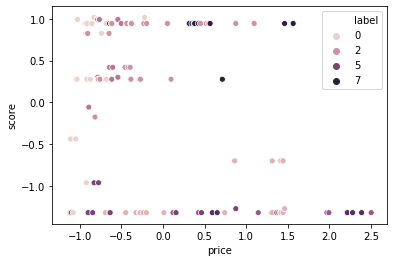

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.scatterplot(x=gf_norm["dep_price"],
                y=gf_norm["score"],
                hue=gf_norm["label"])
plt.xlabel("price")

In [8]:
from sklearn.metrics import silhouette_score
x = []
y = []
for k in range(2, 10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(gf)
    s = silhouette_score(gf, cluster.labels_)
    x.append(k)
    y.append(s)
print("K choice:", x)
print("Score:", y)

K choice: [2, 3, 4, 5, 6, 7, 8, 9]
Score: [0.4238947132017569, 0.36602278576881286, 0.4260229203037899, 0.4432364301279967, 0.4960064848475541, 0.5290901824024057, 0.5566184143436531, 0.48743550321117673]


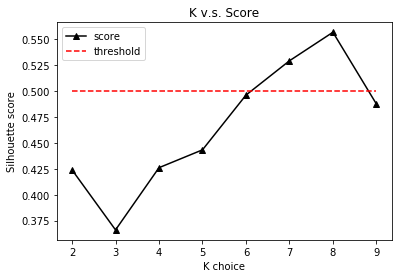

In [9]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
threshold = [0.5] * len(x)
plt.title("K v.s. Score")
plt.xlabel("K choice")
plt.ylabel("Silhouette score")
p1, = plt.plot(x, y, "^-k", label="score")
p2, = plt.plot(x, threshold, "--r", label="threshold")
plt.legend(handles=[p1, p2])

In [11]:
gf.to_csv('E:\\DB103RichardC\\python\\190826PyETL\\gFlightKMeans\\gFlight\\KMOutput\dep0920FriKM.csv')